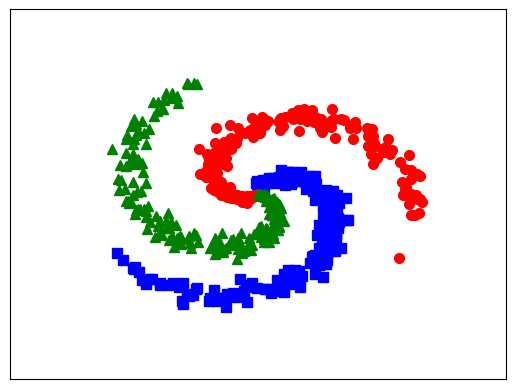

In [99]:
# import the necessary libraries
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt


N = 200 # number of points per class
d = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels


for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j

# lets visualize the data:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7)
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7)
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7)

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])


plt.savefig('example_points.png', bbox_inches='tight', dpi = 600)
plt.show()


In [100]:
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

## One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

d0 = 2
d1 = h = 100 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))


Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate

for i in range(10000):
    ## Feedforward
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)


    # print loss after each 1000 iterations
    if i %1000 == 0:
        # compute the loss: average cross-entropy loss
        loss = cost(Y, Yhat)
        print("iter %d, loss: %f" %(i, loss))


    # backpropagation
    E2 = (Yhat - Y )/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # gradient of ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)


    # Gradient Descent update
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*dW2
    b2 += -eta*db2

Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y)
print('training accuracy: %.2f %%' % acc)

iter 0, loss: 1.098676
iter 1000, loss: 0.124472
iter 2000, loss: 0.044800
iter 3000, loss: 0.031119
iter 4000, loss: 0.025111
iter 5000, loss: 0.021648
iter 6000, loss: 0.019384
iter 7000, loss: 0.017773
iter 8000, loss: 0.016566
iter 9000, loss: 0.015616
training accuracy: 99.67 %


(1, 14400)
200


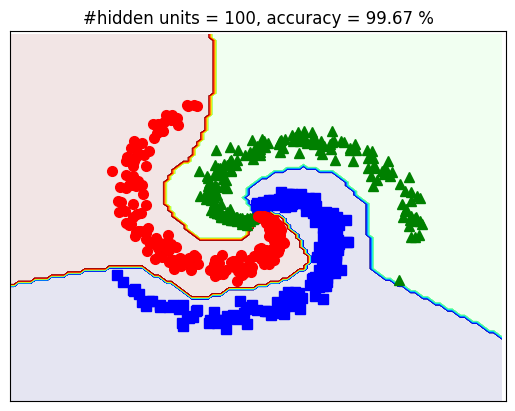

In [101]:
# Visualize results
xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()
print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
# print(xx.shape, yy.shape)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)
X0 = np.vstack((xx1, yy1))
# print(X.shape)
Z1 = np.dot(W1.T, X0) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
# predicted class
Z = np.argmax(Z2, axis=0)
Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)
# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# X = X.T
N = 200
print(N)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7)
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7)
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7)
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
# plt.axis('equal')
# display(X[1:, :], original_label)
fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show()

In [102]:
#Ví dụ 2. Áp dụng vào dữ liệu ảnh chữ số viết tay:
import os
import numpy as np
# set names to the paths because they're too long
data_path = 'data_img'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [103]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000 
    """
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')

    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)

    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)

    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)

    # Read labels 
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)

    labels = np.zeros((real_num)).astype(np.int64)

    # rearrange to correspond the images and labels
    for i in range(0, real_num): 
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
        # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)

        images = images[rand_id, :]
        labels = labels[rand_id,]

    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [104]:
#a. giảm số chiều dữ liệu xuống còn 100 chiều (từ 28x28 = 784 chiều ban đầu) với tập dữ liệu 5000 ảnh bất kỳ.
data_images, data_labels = get_mnist_data(data_images_path,data_labels_path, 5000, shuffle=True)

In [105]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sc = MinMaxScaler(feature_range=(-1,1))
data_images = sc.fit_transform(data_images)
pca = PCA(n_components=100)

data_images_std = pca.fit_transform(data_images)
print(data_images_std.shape)

(5000, 100)


In [106]:
X_train, X_test, y_train, y_test = train_test_split(data_images_std, data_labels, test_size = 0.3, random_state = 2)

In [107]:
X_train.shape, y_train.shape

((3500, 100), (3500,))

In [108]:
print(np.unique(np.array(y_train)))

[0 1 2 3 4 5 6 7 8 9]


In [109]:
#b. Áp dụng các phương pháp phân loại nhiều lớp: Multinomial Logistic Regression và ANN (đã có code) để phân loại, tỷ lệ train:test là 0.7:0.3.
 # áp dụng phương pháp phân loại nhiều lớp: Multinomial Logistic Regression

logr = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=100)
logr.fit(X_train, y_train)

c:\users\laptopdt\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(multi_class='multinomial', solver='sag')

In [110]:
yhat = logr.predict(X_test)
print("accuracy: ", accuracy_score(y_test, yhat))
print("confusion_matrix: ", confusion_matrix(y_test, yhat))

accuracy:  0.8726666666666667
confusion_matrix:  [[142   0   0   1   0   3   2   0   1   0]
 [  2 192   0   0   0   1   0   0   2   0]
 [  3   1 119   7   6   1   4   2   2   0]
 [  3   2   3 116   0   6   2   2   7   2]
 [  0   0   0   0 130   2   1   2   4   3]
 [  4   1   1   7   1 103   1   0   9   3]
 [  2   1   5   0   2   4 136   0   3   0]
 [  0   2   2   0   0   0   0 127   1  11]
 [  0  12   1   7   1   6   2   0 119   3]
 [  1   2   1   5   3   2   0   7   1 125]]


In [111]:

def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z
# cost or loss function
def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

# One-hot coding
from scipy import sparse
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

In [112]:
X = X_train.T

In [113]:
print(X.shape)

(100, 3500)


In [114]:
d0 = 100
d1 = h = 200 # size of hidden layer
d2 = C = 10
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))
Y = convert_labels(y_train, C)
N = X.shape[1]
eta = 1 # learning rate

In [115]:
for i in range(10000):
  ## Feedforward
  Z1 = np.dot(W1.T, X) + b1
  A1 = np.maximum(Z1, 0)
  Z2 = np.dot(W2.T, A1) + b2
  Yhat = softmax(Z2)
  # print loss after each 1000 iterations
  if i %1000 == 0:
    # compute the loss: average cross-entropy loss
    loss = cost(Y, Yhat)
    print("iter %d, loss: %f" %(i, loss))
  
  # backpropagation
  E2 = (Yhat - Y )/N
  dW2 = np.dot(A1, E2.T)
  db2 = np.sum(E2, axis = 1, keepdims = True)
  E1 = np.dot(W2, E2)
  E1[Z1 <= 0] = 0 # gradient of ReLU
  dW1 = np.dot(X, E1.T)
  db1 = np.sum(E1, axis = 1, keepdims = True)

  # Gradient Descent update
  W1 += -eta*dW1
  b1 += -eta*db1
  W2 += -eta*dW2
  b2 += -eta*db2

iter 0, loss: 2.300316
iter 1000, loss: 0.001555
iter 2000, loss: 0.000617
iter 3000, loss: 0.000370
iter 4000, loss: 0.000259
iter 5000, loss: 0.000198
iter 6000, loss: 0.000159
iter 7000, loss: 0.000132
iter 8000, loss: 0.000113
iter 9000, loss: 0.000098


In [117]:
Z1 = np.dot(W1.T, X_test.T) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y_test)
print('training accuracy: %.2f %%' % (acc))
	

training accuracy: 92.80 %


In [118]:
#Ví dụ 3. Áp dụng cho dữ liệu ảnh khuôn mặt (của 15 người, mỗi người có 11 trạng thái):

In [119]:
#c. Giảm số chiều dữ liệu xuống còn 150.

In [121]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# path to the database - change it if needed
path = 'C:\\Python\\Học Máy\\face_data\\'

ids = range(1, 16) # 15 people
states = ['centerlight', 'glasses', 'happy', 'leftlight','noglasses', 'normal', 'rightlight','sad','sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.png' #file extension is png

# open one picture to get the image's size
fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(path + fn, 0)

h = im.shape[0] # hight
w = im.shape[1] # width

D = h * w
N = len(states)*15
print(N, D, h, w)

X = np.zeros((D, N))
y = np.zeros((N, 1))

# collect all data
cnt = 0

# there are 15 people
for person_id in range(1, 16):
    for state in states:

        # get name of each image file
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix

        # open the file and read as grey image
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)

        # then add image to dataset X
        X[:, cnt] = tmp.reshape(D)
        y[cnt] = person_id
        cnt += 1

# Doing PCA, note that each row is a datapoint
from sklearn.decomposition import PCA

# remain dim. k = 150 - change it!
pca = PCA(n_components=150)

# then apply to data X
pca.fit(X.T)

# then build projection matrix
U = pca.components_.T


# then reshape new dataset (reduced dim.) to be new images and save
# path to save reduced dim. images
path_save = 'C:\\Python\\Học Máy\\dim150\\'
for i in range(U.shape[1]):
    plt.axis('off')
    f1 = plt.imshow(U[:, i].reshape(h, w), interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)

    plt.gray()
    fn = path_save + 'eigenface' + str(i).zfill(2) + '.png'
    plt.savefig(fn, bbox_inches='tight', pad_inches=0)

# test results by showing some images
# See reconstruction of first 6 persons
for person_id in range(1, 7):
    for state in ['centerlight']:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = cv2.imread(fn,0)
        plt.axis('off')

        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        plt.gray()
        fn = 'ori' + str(person_id).zfill(2) + '.png'
        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()

        # reshape and subtract mean, don't forget
        x = im.reshape(D, 1) - pca.mean_.reshape(D, 1)

        # encode
        z = U.T.dot(x)

        #decode
        x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)

        # reshape to orginal dim
        im_tilde = x_tilde.reshape(h, w)
        plt.axis('off')

        f1 = plt.imshow(im_tilde, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        plt.gray()
#        fn = 'res' + str(person_id).zfill(2) + '.png'
#        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()

ids = range(1, 16) # 15 people
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.png' #file extension is png

# open one picture to get the image's size
fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(path + fn, cv2.IMREAD_GRAYSCALE)

h = im.shape[0] # hight
w = im.shape[1] # width

D = h * w
N = len(states)*15
print(N, D, h, w)

X = np.zeros((D, N))
y = np.zeros((N, 1))

# collect all data
cnt = 0

# there are 15 people
for person_id in range(1, 16):
    for state in states:

        # get name of each image file
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix

        # open the file and read as grey image
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)

        # then add image to dataset X
        X[:, cnt] = tmp.reshape(D)
        y[cnt] = person_id
        cnt += 1

# Doing PCA, note that each row is a datapoint
from sklearn.decomposition import PCA

# remain dim. k = 150 - change it!
pca = PCA(n_components=150)

# then apply to data X
pca.fit(X.T)

# then build projection matrix
U = pca.components_.T


# then reshape new dataset (reduced dim.) to be new images and save
# path to save reduced dim. images
path_save = 'C:\\Users\\thanhsen\\Notebooks\\MachineLearning\\w7\\dim150\\'
for i in range(U.shape[1]):
    plt.axis('off')
    f1 = plt.imshow(U[:, i].reshape(h, w), interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)

    plt.gray()
    fn = path_save + 'eigenface' + str(i).zfill(2) + '.png'
    plt.savefig(fn, bbox_inches='tight', pad_inches=0)

# test results by showing some images
# See reconstruction of first 6 persons
for person_id in range(1, 7):
    for state in ['centerlight']:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = cv2.imread(fn,0)
        plt.axis('off')

        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        plt.gray()
        fn = 'ori' + str(person_id).zfill(2) + '.png'
        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()

        # reshape and subtract mean, don't forget
        x = im.reshape(D, 1) - pca.mean_.reshape(D, 1)

        # encode
        z = U.T.dot(x)

        #decode
        x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)

        # reshape to orginal dim
        im_tilde = x_tilde.reshape(h, w)
        plt.axis('off')

        f1 = plt.imshow(im_tilde, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        plt.gray()
#        fn = 'res' + str(person_id).zfill(2) + '.png'
#        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()
ids = range(1, 16) # 15 people
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink' ]
prefix = 'subject'
surfix = '.png' #file extension is png

# open one picture to get the image's size
fn = prefix + '01.' + states[0] + surfix
im = cv2.imread(path + fn, cv2.IMREAD_GRAYSCALE)

h = im.shape[0] # hight
w = im.shape[1] # width

D = h * w
N = len(states)*15
print(N, D, h, w)

X = np.zeros((D, N))
y = np.zeros((N, 1))

# collect all data
cnt = 0

# there are 15 people
for person_id in range(1, 16):
    for state in states:

        # get name of each image file
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix

        # open the file and read as grey image
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)

        # then add image to dataset X
        X[:, cnt] = tmp.reshape(D)
        y[cnt] = person_id
        cnt += 1

# Doing PCA, note that each row is a datapoint
from sklearn.decomposition import PCA

# remain dim. k = 150 - change it!
pca = PCA(n_components=150)

# then apply to data X
pca.fit(X.T)

# then build projection matrix
U = pca.components_.T


# then reshape new dataset (reduced dim.) to be new images and save
# path to save reduced dim. images
path_save = 'C:\\Python\\Học Máy\\w7\\dim150\\'
for i in range(U.shape[1]):
    plt.axis('off')
    f1 = plt.imshow(U[:, i].reshape(h, w), interpolation='nearest')
    f1.axes.get_xaxis().set_visible(False)

    plt.gray()
    fn = path_save + 'eigenface' + str(i).zfill(2) + '.png'
    plt.savefig(fn, bbox_inches='tight', pad_inches=0)

# test results by showing some images
# See reconstruction of first 6 persons
for person_id in range(1, 7):
    for state in ['centerlight']:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        im = cv2.imread(fn,0)
        plt.axis('off')

        f1 = plt.imshow(im, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        plt.gray()
        fn = 'ori' + str(person_id).zfill(2) + '.png'
        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()

        # reshape and subtract mean, don't forget
        x = im.reshape(D, 1) - pca.mean_.reshape(D, 1)

        # encode
        z = U.T.dot(x)

        #decode
        x_tilde = U.dot(z) + pca.mean_.reshape(D, 1)

        # reshape to orginal dim
        im_tilde = x_tilde.reshape(h, w)
        plt.axis('off')

        f1 = plt.imshow(im_tilde, interpolation='nearest')
        f1.axes.get_xaxis().set_visible(False)
        plt.gray()
#        fn = 'res' + str(person_id).zfill(2) + '.png'
#        plt.savefig(fn, bbox_inches='tight', pad_inches=0)
        plt.show()

AttributeError: 'NoneType' object has no attribute 'states'

In [ ]:
# Áp dụng các phương pháp phân loại nhiều lớp: Multinomial Logistic Regression và ANN (đã có code) để phân loại, tỷ lệ train:test là 0.7:0.3

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=0.3, random_state=42)

# Multinomial Logistic Regression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial', max_iter=1000).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy of Multinomial Logistic Regression: ', accuracy_score(y_test, y_pred))

# ANN
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy of ANN: ', accuracy_score(y_test, y_pred))